<a href="https://colab.research.google.com/github/Sadhwika06/DNA_project-/blob/main/DNA_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load dataset (Fashion MNIST)
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input (28x28x1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test  = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Class names
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.7810 - loss: 0.6093 - val_accuracy: 0.8774 - val_loss: 0.3460
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8884 - loss: 0.3053 - val_accuracy: 0.8888 - val_loss: 0.3057
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9058 - loss: 0.2524 - val_accuracy: 0.8943 - val_loss: 0.2876
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9157 - loss: 0.2252 - val_accuracy: 0.9096 - val_loss: 0.2497
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9287 - loss: 0.1929 - val_accuracy: 0.9092 - val_loss: 0.2586


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


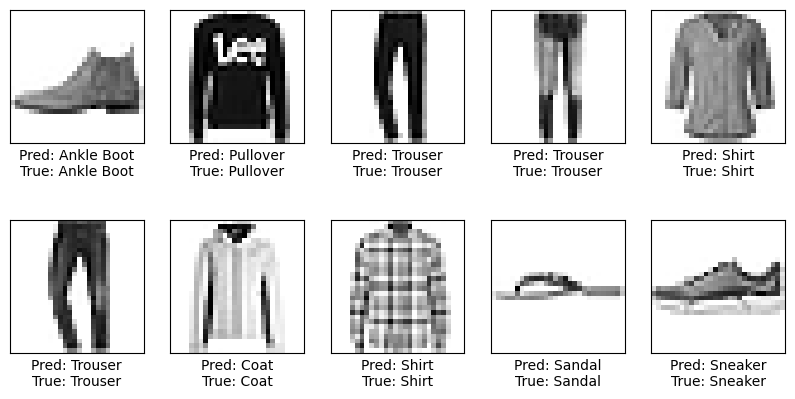

In [ ]:
# Predict first 10 images
predictions = model.predict(x_test[:10])

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("Pred: " + class_names[np.argmax(predictions[i])] +
               "\nTrue: " + class_names[y_test[i]])
plt.show()

In [ ]:
# Save
model.save("fashion_cnn_model.h5")

# Reload
from tensorflow.keras.models import load_model
loaded_model = load_model("fashion_cnn_model.h5")
